Usamos el dataset MNIST para clasificar digitos con otro modelo de clasificación.

El dataset contiene imagenes de 28x28 pixeles en escala de grises (0-255) de digitos escritos a mano.
Hay 60,000 imagenes de entrenamiento y 10,000 imagenes de prueba.

In [45]:
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# cargamos los datos de las imagenes en /mnist/train-images-idx3-ubyte.gz
def load_mnist_images(path):
  with gzip.open(path, 'rb') as f:
		# desempaquetamos: leemos los 4 enteros en big-endian que indican metadatos
    _ignored, n_images, rows, cols = struct.unpack('>IIII', f.read(16))
		# leemos el resto de bytes del archivo como enteros de 8 bits sin signo
    all_pixels = np.frombuffer(f.read(), dtype=np.uint8)
		# reshape para que cada imagen sea una fila (n_images) y cada pixel sea una columna (rows*cols)
    X = all_pixels.reshape(n_images, rows * cols)
  return X

X = load_mnist_images('mnist/train-images-idx3-ubyte.gz')
X
		

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

In [47]:
#cargamos los datos de las etiquetas en /mnist/train-labels-idx1-ubyte.gz
def load_mnist_labels(path):
  with gzip.open(path, 'rb') as f:
		# desempaquetamos: leemos los 2 enteros en big-endian que indican metadatos
    f.read(8)
		# leemos el resto de bytes del archivo como enteros de 8 bits sin signo
    all_labels = f.read()
		# reshape para que cada etiqueta sea una fila
    Y = np.frombuffer(all_labels, dtype=np.uint8).reshape(-1, 1)
  return Y

Y = load_mnist_labels('mnist/train-labels-idx1-ubyte.gz')

Y

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], shape=(60000, 1), dtype=uint8)

In [48]:
# Para usar el modelo de clasificacion binaria, necesitamos cambiar las etiquetas de 0-9 a 0 o 1
# para eso elejimos un numero (5) y lo cambiamos a 1 y el resto a 0
Y = (Y == 5).astype(int)
Y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], shape=(60000, 1))

In [49]:
digits = X[Y.flatten() == 1]
digits


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5421, 784), dtype=uint8)

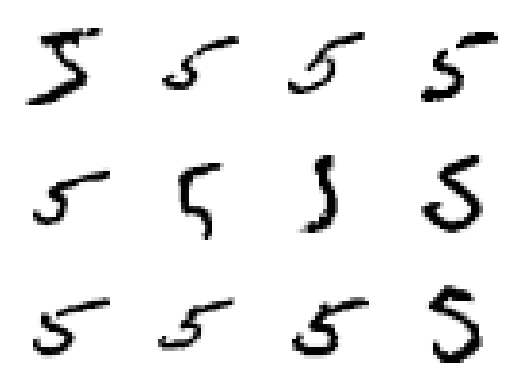

In [50]:
# visualizamos algunos de los digitos
r,c = 3,4
fig = plt.figure()

for i in range(r*c):
	ax = fig.add_subplot(r,c,i+1)
	ax.axis('off')
	ax.imshow(digits[i].reshape((28,28)), cmap='Greys')
plt.show()

In [51]:
# Importamos las funciones del notebok anterior

def sigmoid(x) -> float:
	return 1 / (1 + np.exp(-x))

########ESTAS FUNCIONES SE USAN EN LA FASE DE ENTRENAMIENTO########
# esta era nuestra funcion de prediccion
def weighted_sum(X,w) -> np.ndarray:
	return np.matmul(X,w)

# apliquemos el sigmoide
# el proceso de mover datos procesados a traves del modelo se llama forward propagation
def forward(X,w) -> np.ndarray:
	return sigmoid(weighted_sum(X,w))

def log_loss(X, Y, w):
  y_hat = forward(X, w)
  first_term = Y * np.log(y_hat)
  second_term = (1 - Y) * np.log(1 - y_hat)
  return -np.average(first_term + second_term)

def gradient(X, Y, w):
  return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]

def train(X, Y, iterations, lr) -> np.ndarray:
	w = np.zeros((X.shape[1], 1))

	for i in range(iterations):
		print(f'Iteration {i} => Loss: {log_loss(X, Y, w)}')
		w -= gradient(X,Y,w) * lr
	
	return w

#########ESTA FUNCIÓN SE USA PARA LA FASE DE CLASIFICACIÓN###########
# como queremos que el resultado sea 1 o 0 (no un numero entre 1 y 0) redondeamos los resultados al entero mas cercano
def classify(X,w) -> np.ndarray:
	return np.round(forward(X,w))

In [52]:
# Ahora corremos el modelo!
# insertamos una columna de 1's para el bias
X = np.insert(X, 0, 1, axis=1)
X

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], shape=(60000, 785), dtype=uint8)

In [53]:
w = train(X, Y, iterations=4000, lr=1e-5)

# loss con 1000 iteraciones: 0.09350010375441301924

Iteration 0 => Loss: 0.6931471805599453
Iteration 1 => Loss: 0.8004253025949019
Iteration 2 => Loss: 0.6037018000801918
Iteration 3 => Loss: 0.41561114405207106
Iteration 4 => Loss: 0.264885394555525
Iteration 5 => Loss: 0.2197496658646801
Iteration 6 => Loss: 0.2116971966744956
Iteration 7 => Loss: 0.20475082478710038
Iteration 8 => Loss: 0.19886878484015674
Iteration 9 => Loss: 0.19372162858641284
Iteration 10 => Loss: 0.18918194048765816
Iteration 11 => Loss: 0.18512959704505969
Iteration 12 => Loss: 0.1814815604080142
Iteration 13 => Loss: 0.17817479685293547
Iteration 14 => Loss: 0.17515915471115795
Iteration 15 => Loss: 0.1723953506165786
Iteration 16 => Loss: 0.16985095072606282
Iteration 17 => Loss: 0.16749932830345124
Iteration 18 => Loss: 0.1653180724308886
Iteration 19 => Loss: 0.16328826613520675
Iteration 20 => Loss: 0.16139375633494252
Iteration 21 => Loss: 0.15962067801752663
Iteration 22 => Loss: 0.15795704638735247
Iteration 23 => Loss: 0.15639244690731702
Iteration 24

In [70]:
# ahora cargamos los datos de test
X_test = load_mnist_images('mnist/t10k-images-idx3-ubyte.gz')
X_test = np.insert(X_test, 0, 1, axis=1)

Y_test = load_mnist_labels('mnist/t10k-labels-idx1-ubyte.gz')
Y_test = (Y_test == 5).astype(int)

Y_test


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], shape=(10000, 1))

In [ ]:
# hacemos inferencia para testear el modelo
total_examples = X_test.shape[0]
correct_results = np.sum(classify(X_test, w) == Y_test)
success_rate = correct_results / total_examples
print(f'Total examples: {total_examples}, Correct results: {correct_results}, Success: {success_rate * 100} %')

Total examples: 10000, Correct results: 9762, Success: 97.61999999999999%


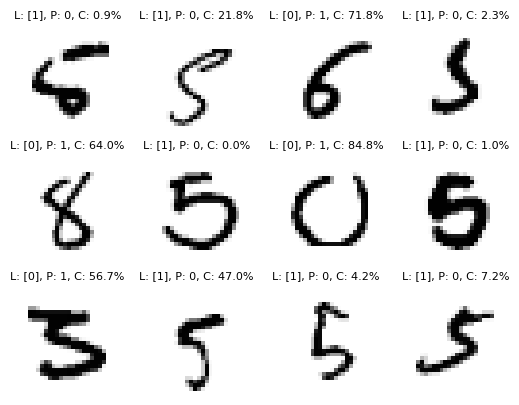

In [94]:
# ejemplos de errores, vamos a visualizar solo 12 (3x4)
# si el modelo predice 1 y la etiqueta real es 0, se considera un falso positivo (FP)
# si el modelo predice 0 y la etiqueta real es 1, se considera un falso negativo (FN)
samples = 1
fig2 = plt.figure()

for i in range(Y_test.shape[0]):
	label = Y_test[i]
	prediction = classify(X_test[i], w)[0]

	if prediction != Y_test[i]:
		ax = fig2.add_subplot(3,4,samples)
		ax.axis('off')
		ax.imshow(X_test[i][1:].reshape((28,28)), cmap='Greys')
		# imprime la etiqueta real, la prediccion y la "confianza" del modelo de que el digito sea un 5
		ax.set_title(f'L: {label}, P: {int(prediction)}, C: {forward(X_test[i], w)[0]*100:.1f}%', fontsize=8)
		samples += 1

		if samples > 12:
			break

plt.show()